# Car Dekho - (car price detection):

### Loading the packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

## Step1- Loading and reading the dataset:

In [2]:
df = pd.read_csv("C:\\Users\\91891\\Downloads\\Car-details-v3.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Step2- Data cleaning:

In [3]:
# to find out how many rows and columns in dataset:

df.shape

(8128, 13)

In [4]:
# findout the missing data..

df.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
# check the information of data..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# let's do the some stastics like mean, standard deviation..., count etc..

df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
df['seller_type'].value_counts()

Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [9]:
df['transmission'].value_counts()

Manual       7078
Automatic    1050
Name: transmission, dtype: int64

In [10]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [11]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [12]:
# replace Nan values..

df['max_power'] = df['max_power'].replace({" ", np.NaN})

In [13]:
# to select the rows in random..

df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
273,Maruti Swift 1.2 DLX (Only Delhi),2014,375000,80000,Petrol,Individual,Manual,First Owner,20.4 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
3112,Hyundai Creta 1.6 SX Option,2019,1150000,31000,Petrol,Dealer,Manual,First Owner,15.8 kmpl,1591 CC,121.3 bhp,151Nm@ 4850rpm,5.0
7652,Maruti Alto 800 LXI Airbag,2015,250000,70000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0
1087,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
7428,Toyota Platinum Etios 1.4 GXD,2018,780000,116000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.05 bhp,170Nm@ 1800-2400rpm,5.0


In [14]:
# to drop null values..

df.dropna(inplace = True)

In [15]:
# to check the null values..

df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [16]:
# remove unwanted columns..

df.drop(columns=['name'], inplace=True)
df.drop(columns=['torque'], inplace = True)
df.head(2)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0


In [17]:
catg_cols = ['year','fuel','seller_type','transmission','owner' ]
num_cols = ['selling_price','km_driven','mileage','engine','max_power','seats']

### Inspecting Target Variabe:

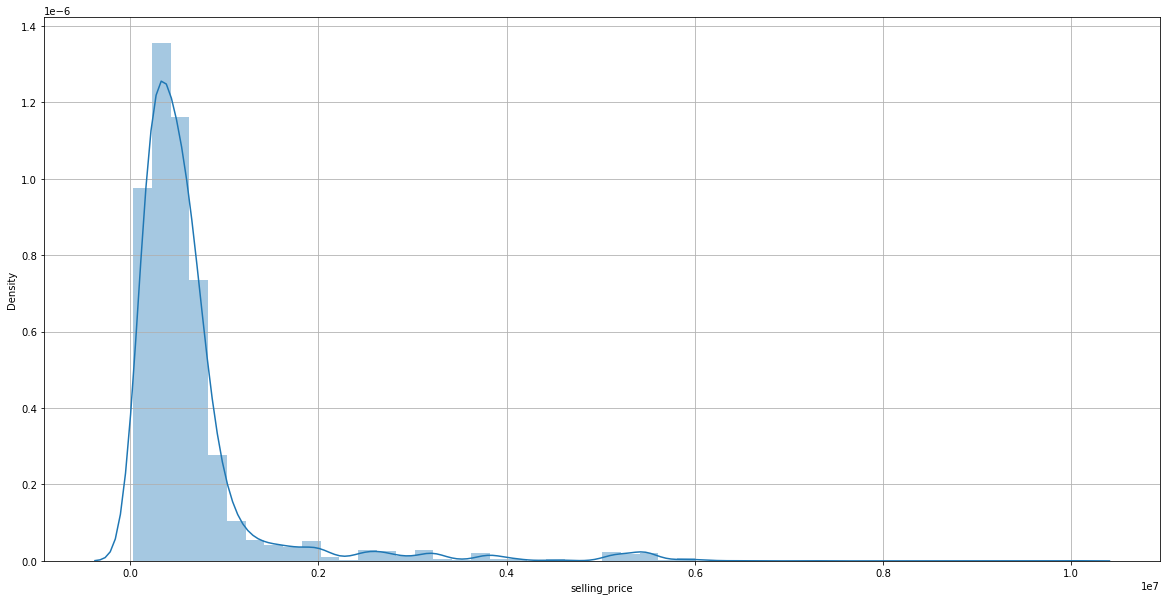

In [18]:
plt.figure(figsize = [20,10])

sns.distplot(df['selling_price'])
plt.grid()
plt.show()

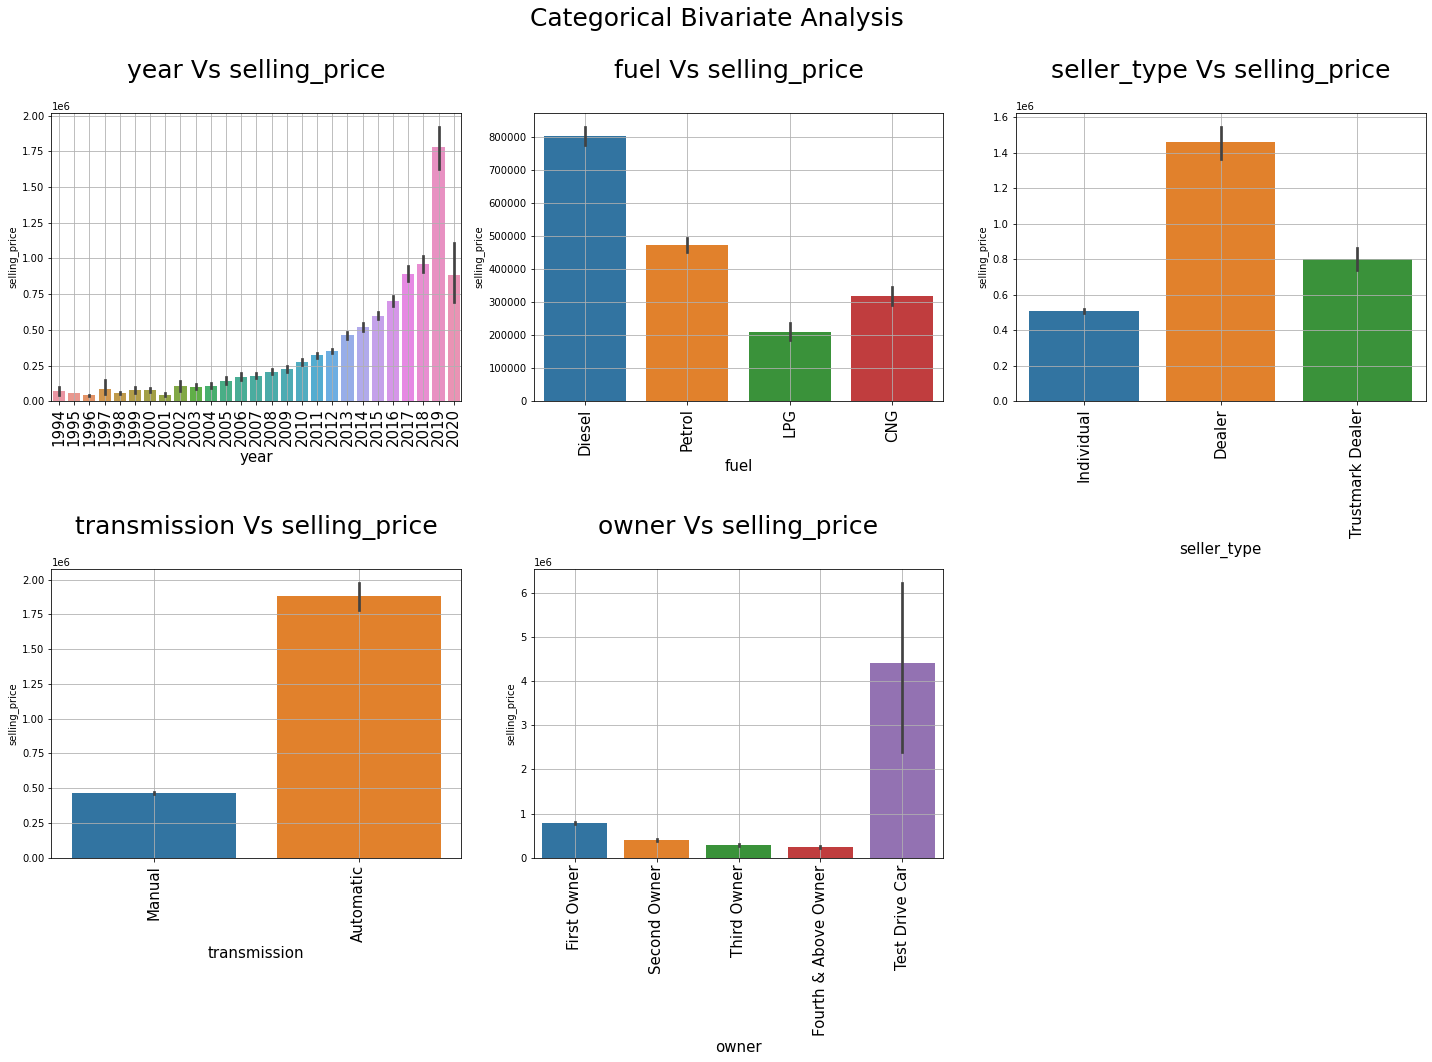

In [19]:
# categorical bivariate analysis..

plt.figure(figsize = [20,15])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize = 25)
i=1

for col in catg_cols:
    plt.subplot(2,3,i)
    sns.barplot(x = df[col], y = df['selling_price'])
    plt.title(f'{col} Vs selling_price\n', fontdict={'size':25})
    plt.xlabel(col, size=15)
    plt.xticks(size=15, rotation=90)
    i+=1
    plt.grid()
    
plt.tight_layout()
plt.show()

#### Insights:

  1. From the above we can observe that the selling price has increased in the Years 2015 - 2019.
  2. Diesel cars have more selling price than other cars.
  3. Dealers are pertaining to keep the selling price significantly high compared to individual sellers
  4. Automatic cars obviously are priced higher but the test drive cars are having huge prices compared to other classes.

## Step3 - Data Preprocessing:

### Replace the units in columns:

In [22]:
df['max_power'] = df['max_power'].str.replace('bhp','')


In [23]:
df['engine'] = df['engine'].str.replace('CC','')

In [24]:
df['mileage'] = df['mileage'].str.replace('kmpl','')
df['mileage'] = df['mileage'].str.replace('km/kg','')

In [25]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


### Using Label-Encoding for Categorical columns:

In [26]:
# using label- encoding to fuel column...

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])

In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.4,1248,74,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5.0
2,2006,158000,140000,3,1,1,4,17.7,1497,78,5.0
3,2010,225000,127000,1,1,1,0,23.0,1396,90,5.0
4,2007,130000,120000,3,1,1,0,16.1,1298,88.2,5.0


In [28]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## Step4- Splitting dataset into Train & Test sets:

In [29]:
y = df['selling_price']
x = df.drop(columns = 'selling_price')

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 100)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (6324, 10)
x_test:  (1582, 10)
y_train:  (6324,)
y_test:  (1582,)


### Model Building:

In [31]:
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as model_selection

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
# find the accuracy score of y_test and then compared with x_test..

lr.score(x_test, y_test)

0.6776199051319225

In [33]:
# to find y_pred using x_test..

y_pred = lr.predict(x_test)
y_pred

array([705436.93728413, 338843.37002254, 762012.98210239, ...,
       135526.83156569, 536449.03009477, 540514.14830258])

### Finding the Errors:

In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 280222.13399788935
Mean Squared Error: 223802765682.33432
Root Mean Squared Error: 473077.96998204675
r2_score: 0.6776199051319225
